# random forest

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

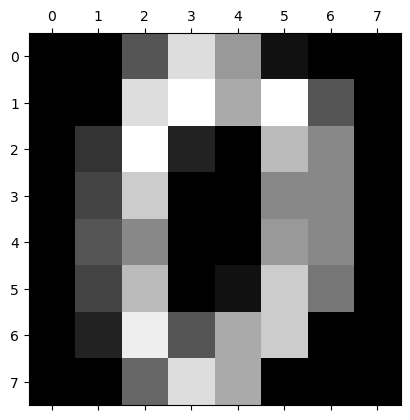

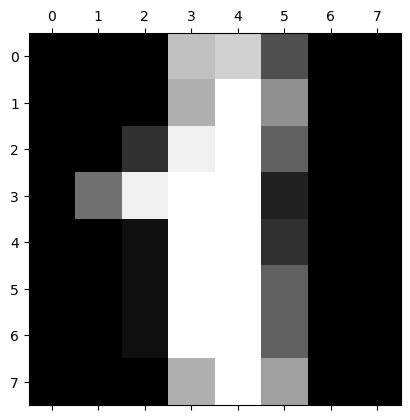

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])
    plt.show()

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
df = pd.DataFrame(digits.data)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [8]:
df['target'] = digits.target
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test,  Y_train, Y_test = train_test_split(df.drop(['target'], axis='columns'), 
                                                     digits.target, test_size=0.2)

In [10]:
len(X_train)

1437

In [11]:
len(X_test)

360

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500) # number of random trees
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500)

In [15]:
model.score(X_test, Y_test)

0.9833333333333333

## Confusion matrix

In [16]:
y_predicted = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test, y_predicted)
cm

array([[38,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 38,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 35]], dtype=int64)

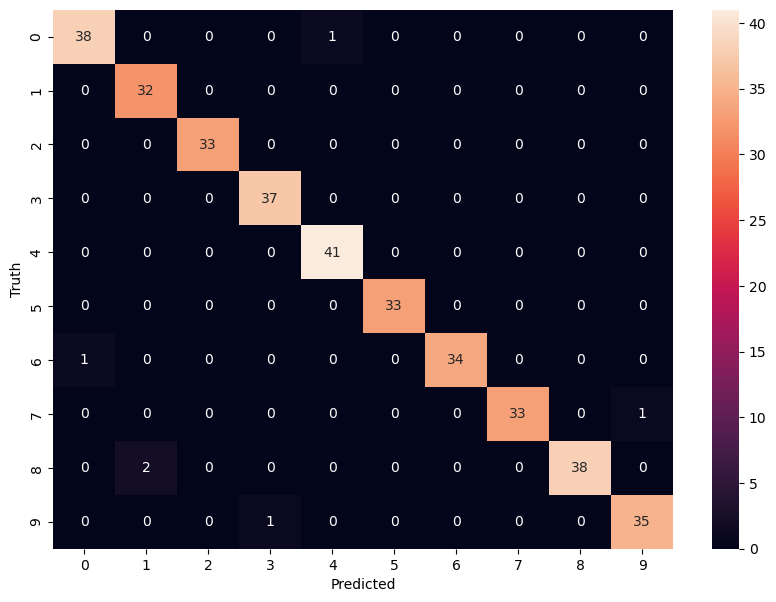

In [18]:
import seaborn as sn
plt.figure(figsize= (10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show() 